In [43]:
from media_impact_monitor.util.cache import get
from datetime import date, timedelta

res = get(
    "https://api.demodiff.de/entities",
    params=dict(
        size=5000, start_date=(date.today() - timedelta(days=7)).strftime("%Y-%m-%d")
    ),
).json()
print(res["total"])
data = res["data"]
for d in data:
    del d["properties"]["description"]
data[:3]


1706


[{'id': 'cef81a345ccdd1f859bf67e1f23b3f0e4eee8f0d',
  'datasets': ['dd-ger-berlin'],
  'referents': [],
  'schema': 'Event',
  'properties': {'name': ['Genozid an den Jesiden (vom 28.07. bis 29.09.2024 - täglich)'],
   'startDate': ['2024-08-01T00:00:00'],
   'endDate': ['2024-08-01T00:00:00'],
   'location': ['Platz der Republik, 10557 Berlin',
    'Heinrich-von-Gagern-Str., 10557 Berlin']}},
 {'id': 'c6b0491dfdf57302f7b834984676bfb1ade56e6e',
  'datasets': ['dd-ger-berlin'],
  'referents': [],
  'schema': 'Event',
  'properties': {'name': ['Mahnwache für eine sozial- und klimagerechte Verkehrsw- ende (vom 22.07. bis 13.09.2024 - täglich)'],
   'startDate': ['2024-08-01T00:00:00'],
   'endDate': ['2024-08-01T23:59:00'],
   'location': ['Platz der Republik, 10557 Berlin']}},
 {'id': '7d1e9907a009d9b0efa5f375d4bee6390347aa90',
  'datasets': ['dd-ger-berlin'],
  'referents': [],
  'schema': 'Event',
  'properties': {'name': ['Petition für die Evakuierung unserer zurückgebliebenen Kinder 

In [44]:
item = get(f"https://api.demodiff.de/entities/{data[0]['id']}").json()
del item["properties"]["description"]
item


{'id': 'cef81a345ccdd1f859bf67e1f23b3f0e4eee8f0d',
 'datasets': ['dd-ger-berlin'],
 'referents': [],
 'schema': 'Event',
 'properties': {'name': ['Genozid an den Jesiden (vom 28.07. bis 29.09.2024 - täglich)'],
  'startDate': ['2024-08-01T00:00:00'],
  'endDate': ['2024-08-01T00:00:00'],
  'location': ['Platz der Republik, 10557 Berlin',
   'Heinrich-von-Gagern-Str., 10557 Berlin']}}

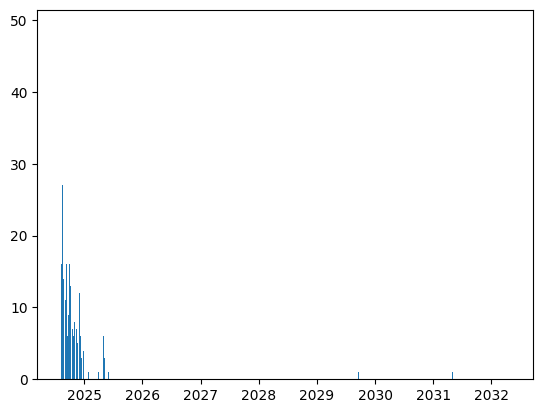

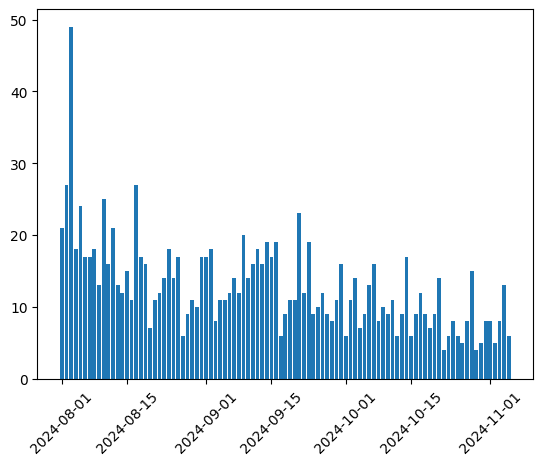

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

ds = (
    pd.Series([pd.to_datetime(d["properties"]["startDate"][0]).date() for d in data])
    .value_counts()
    .sort_index()
)
ds = ds.reindex(pd.date_range(ds.index.min(), ds.index.max(), freq="D")).fillna(0)
ds.index = ds.index.date
plt.bar(ds.index, ds.values)
plt.show()
ds = ds[ds.index < (date.today() + timedelta(days=90))]
plt.bar(ds.index, ds.values)
plt.setp(plt.gca().xaxis.get_majorticklabels(), "rotation", 45)
plt.show()
